In [1]:
#Needed in general
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5
import gc

#Quick fudge to make import from ../Scripts work
sys.path.append('../../Scripts')

#Custom imports
import ClassCOMPAS     as CC ###
# import ClassFormationChannels as FC 


# import script that has formation channel classification functions:
from PostProcessingScripts import * 
from ClassFormationChannels_5mainchannels import * 



# from matplotlib.ticker import AutoMinorLocator, MultipleLocator
# minor = AutoMinorLocator()
# import math # for tan function and degrees function

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


../../Scripts/PostProcessingScripts.py:25: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
../../Scripts/PostProcessingScripts.py:44: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
../../Scripts/PostProcessingScripts.py:45: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble'] = [r'\bol

In [2]:
from astropy.cosmology import WMAP9

import astropy.constants as c
import astropy.units  as u

In [3]:
print(WMAP9.H0)
print((1./WMAP9.H0).to(u.Gyr))
print(WMAP9.Om)
print(WMAP9.Odm)
print(WMAP9.Ob)
print(1-0.286-0.0463)

69.32 km / (Mpc s)
14.105485021361645 Gyr
<bound method FLRW.Om of FlatLambdaCDM(name="WMAP9", H0=69.3 km / (Mpc s), Om0=0.286, Tcmb0=2.725 K, Neff=3.04, m_nu=[0. 0. 0.] eV, Ob0=0.0463)>
<bound method FLRW.Odm of FlatLambdaCDM(name="WMAP9", H0=69.3 km / (Mpc s), Om0=0.286, Tcmb0=2.725 K, Neff=3.04, m_nu=[0. 0. 0.] eV, Ob0=0.0463)>
<bound method FLRW.Ob of FlatLambdaCDM(name="WMAP9", H0=69.3 km / (Mpc s), Om0=0.286, Tcmb0=2.725 K, Neff=3.04, m_nu=[0. 0. 0.] eV, Ob0=0.0463)>
0.6677


# Code to prepare Figure 4 
run all of them 


In [22]:
''' Below I plot the ZAMS masses of the binaries forming BHNS or NSBH showing the formation channels '''


    


def plotInitialMasses(ax, fc, Data, dictRank, dictList, channelLabelList, withinHubble=True):
    """
    ## parameters: 
    ax: axes to plot on
    fc: formationchannels function 
    Data: Data with the target binary already specified
    dictRank: dictionary of the channels & their channel nr for all metallicities
    dictList: List with the names of the channels
    channelLabelList # hack for which labels to give in legend
    withinHubble: whether to select only DCOs that merge in a Hubble time
    """
    maxM2ZAMSOLD, maxM1ZAMSOLD = 0,0
    solar=0.0142
    LowZ = solar/10.
    
    
    
    for z_ind in range(2):
        print('now at z_ind = %s, '%(z_ind))
        log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)
        for nrC, Channel in enumerate(dictList):
                        
#             #Get the seeds that relate to sorted indices
            seedsInterest = dictRank[Channel]
            
            #Get metallicity systems this works because seeds in both
            #files are in the same order
            mask = np.in1d(Data.seeds, np.array(seedsInterest))
            
            if withinHubble == True:
                mask = mask & (Data.Hubble == True)
            DATAmetallicities = Data.metallicitySystems[mask]

            # use the cosmic integrated weights if they exist - Coen Model
            if WeightsRateIntrinsic_zIntegrated==True:

                weight = rateIntrinsic_zIntegrated
            else:
                weight = Data.weight
            
            maskZlow = (DATAmetallicities <= LowZ)
            maskZhigh = (DATAmetallicities >LowZ)
            
            if z_ind==0:   
                M1ZAMS = Data.m1zams[mask][maskZlow]
                M2ZAMS = Data.m2zams[mask][maskZlow]
                weights= weight[mask][maskZlow]
            elif z_ind==1:
                M1ZAMS = Data.m1zams[mask][maskZhigh]
                M2ZAMS = Data.m2zams[mask][maskZhigh]
                weights= weight[mask][maskZhigh]

  
            
            if z_ind==0: # only legendlabel in one of 2 metallicity plots

                legendlabel=Channel
            else:
                legendlabel=None
            ax[z_ind].scatter((M1ZAMS),(M2ZAMS),s=weights*stimes_weight, linewidth=0.1, \
                              c=colorlist[nrC],label =legendlabel, zorder=zorderlist[Channel], edgecolor=['none'])

            if list(M1ZAMS):
                print( len(M1ZAMS), '= # BHNS in this sub channel')
       
     
        if z_ind==0:
            
            ax[z_ind].set_ylabel(ylabel, fontsize=fs)
            
        ax[z_ind].yaxis.set_minor_locator(AutoMinorLocator())
        ax[z_ind].xaxis.set_minor_locator(AutoMinorLocator())
        
        ax[z_ind].tick_params(labelsize=fs)
        ax[z_ind].set_xlabel(xlabel, fontsize=fs)
        
        xmin, xmax = 5,150
        ymin, ymax = 5,50
        ax[z_ind].set_xlim(xmin, xmax)
        ax[z_ind].set_ylim(ymin, ymax)  
        

        ax[z_ind].tick_params(labelsize=fs)
        

        ## Add constant mass ratio lines 
        x_q = np.linspace(5,150) # Msun, M1 range
        # plot a few fixed mass ratios:
        qlist = [5., 3.333333334, 2., 1.]
        qtextvalue=[0.2, 0.3,  0.5, 1]
        for ind_q, qvalue in enumerate(qlist):
            y_q =  x_q / qvalue
            
            
            y_text = 45 # Msun 
            if y_text*qvalue < 150:
                x_text = y_text * qvalue 
            else: 
                x_text = 141.
                y_text = x_text / qvalue
                
            # I am calculating the angle theta for the text: (see notes on this)
            delta_y = ((y_text - ymin) / (ymax-ymin)) 
            delta_x = ((x_text - xmin*qvalue) / (xmax-xmin))
            ratio = delta_y / delta_x
            theta_angle = math.degrees(math.atan((ratio)))

            ax[z_ind].plot(x_q, y_q, c='k', lw=2, linestyle =':')
            ax[z_ind].text(x_text, y_text, s=r'$q_{\rm{i}} =$ %s '%qtextvalue[ind_q], fontsize=14, \
                           horizontalalignment='center', verticalalignment='bottom', rotation=theta_angle)   
                
        
        
    

        # PLOT metallicity labels 
        if z_ind==0:
            text_Z =    r'low metallicities, '+ r'$Z_{\rm{i}} \leq Z_{\odot}/10$' # 'low metallicity \n '
        elif z_ind==1:
            text_Z =    r'high metallicities, ' + r'$Z_{\rm{i}} > Z_{\odot}/10$'  #'high metallicity \n'
        
        if PlotText == True:
            bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
            ax[z_ind].annotate(text_Z, xy=(0.5, 1.08), xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='center', va="top",bbox=bbox_props)
            
        if (LOOP == True) & (z_ind==0):
            
            bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
            ax[z_ind].annotate(r'\textbf{model %s:}'%(bps_model) +'\n' + alphabetPhysicalNameDict[bps_model], xy=(0.042, .95),\
                         xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='left', va="top",bbox=bbox_props,\
                        zorder=1E10)
        
        if z_ind ==0:    
            handles, labels = ax[z_ind].get_legend_handles_labels()
    
    
    return handles, labels




In [23]:


def plotInitialqVSseparation(ax, fc, Data, dictRank, dictList, withinHubble=True):
    """
    plots the initial mass ratio and separation for the binaries. 
    ## parameters: 
    ax: axes to plot on
    fc: formationchannels function 
    Data: Data with the target binary already specified
    dictRank: dictionary of the channels & their channel nr for all metallicities
    dictList: List with the names of the channels
    withinHubble: whether to select only DCOs that merge in a Hubble time
    """
    maxM2ZAMSOLD, maxM1ZAMSOLD = 0,0
    solar=0.0142
    LowZ = solar/10.
    
    for z_ind in range(2):
        print('now at z_ind = %s'%(z_ind))

        solar = 0.0142
        log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)
        for nrC, Channel in enumerate(dictList):
            #Get the seeds that relate to sorted indices
            seedsInterest = dictRank[Channel]
            

            #Get metallicity systems this works because seeds in both
            #files are in the same order
            mask = np.in1d(Data.seeds, np.array(seedsInterest))
            if withinHubble == True:
                mask = mask & (Data.Hubble == True)
            DATAmetallicities = Data.metallicitySystems[mask]
           
            
            # split in low and high metallicities
            maskZlow = (DATAmetallicities <= LowZ)
            maskZhigh = (DATAmetallicities > LowZ)

            
            # if wanted, use the cosmic integrated weights if they exist 
            if WeightsRateIntrinsic_zIntegrated==True:

                weight = rateIntrinsic_zIntegrated
            else:
                weight = Data.weight

            
            if z_ind==0:
                M1ZAMS = Data.m1zams[mask][maskZlow]
                M2ZAMS = Data.m2zams[mask][maskZlow]
                separationInitial = Data.separationzams[mask][maskZlow]
                weights= weight[mask][maskZlow] 
            elif z_ind==1:
                M1ZAMS = Data.m1zams[mask][maskZhigh]
                M2ZAMS = Data.m2zams[mask][maskZhigh]
                separationInitial = Data.separationzams[mask][maskZhigh]
                weights= weight[mask][maskZhigh]    
            separationInitial = np.log10(separationInitial)
            qZAMS = M2ZAMS /M1ZAMS



            if z_ind==0: # only legendlabel in one of 2 metallicity plots
                legendlabel=None
            else:
                legendlabel=None
            

            if len(weights):

                ax[z_ind].scatter(qZAMS,separationInitial,s=weights*stimes_weight,  linewidth=0.1,\
                                 c=colorlist[nrC],label =legendlabel, zorder=zorderlist[Channel],edgecolor=['none'])
                                  

            
        if z_ind==0:  
            ax[z_ind].set_ylabel(ylabel, fontsize=fs)

        ax[z_ind].xaxis.set_minor_locator(AutoMinorLocator())
        
        ax[z_ind].tick_params(labelsize=fs)
        ax[z_ind].set_xlabel(xlabel, fontsize=fs)



        ax[z_ind].set_xlim(0, 1)
        ax[z_ind].set_ylim(-1.4, 2.3) 


        ##################
        
        
        ax[z_ind].yaxis.set_minor_locator(AutoMinorLocator())

        # ADD separation lines
        xcord_line = np.linspace(-2,3,100)
        # plot a few coordinates:
        ycordlist = [0.5, 5, 50]
        for ind_cord, ycord in enumerate(ycordlist):
            ycord_line = np.log10(ycord) * np.ones_like(xcord_line)
            ax[z_ind].plot(xcord_line, ycord_line, c='k', lw=2, linestyle =':')
            ax[z_ind].text(0.02, np.log10(ycord), s=r' %s $\rm{AU}$'%ycord, fontsize=14, \
                           horizontalalignment='left', verticalalignment='bottom', rotation=0)         
        
    
    return handles, labels


# create Figure 4

## load and prepare Data 

In [27]:
# path to hdf5 file (which I pass to the formationChannel file later)
# in this case we want to show the results for the fiducial binary population synthesis model for BHNS mergers,
# this file is called 'COMPASCompactOutput_BHNS_A.h5' and given in Zenodo. For you the path '/Volumes/Andromeda/DATA/AllDCO_bugfix/fiducial' will likely be different
# and be instead the folder where you downloaded the data
pathCOMPASOutput = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_25/COMPASCompactOutput_BBH_B.h5'

fdata = h5.File(pathCOMPASOutput)
print(fdata.keys())

<KeysViewHDF5 ['RLOF', 'commonEnvelopes', 'doubleCompactObjects', 'formationChannels', 'supernovae', 'systems', 'weights_detected', 'weights_detectedPerRedshift', 'weights_intrinsic', 'weights_intrinsicPerRedshift']>


In [28]:




#### Fiducial 
MODEL = 'beta0_25'



#But I want only within Hubble time 
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=1)
Data.setCOMPASDCOmask(types='BBH',  withinHubbleTime=True, optimistic=False)
Data.setCOMPASData()
SeedsHubble    = Data.seeds[Data.Hubble==True]






weighted samples :-D
Remember to  self.setCOMPASDCOmask() and self.setCOMPASData()


In [29]:

# calculate the uncertainty on the rate from poisson scatter: 
print('total weight BHNS mergers in COMPAS simulation =', np.sum(Data.weight))
rate = np.sum(Data.weight)
Nzeros = int(53*1E6 - len(Data.weight))
all_weights = np.concatenate((np.zeros(Nzeros), Data.weight))
var_rate = np.std(all_weights, ddof=1) * np.sqrt(1E6)

print('fractional uncertainty on total weight BH-NS =', var_rate/rate)
print('percentage uncertainty on total weight BH-NS =', 100*var_rate/rate, '%')

print('STROOPWAFEL gain =', len((Data.weight))/np.sum(Data.weight))

# metallicities 
DATAmetallicities = Data.metallicitySystems

# size to multiply the scatterpoint area with
stimes_weight = 200


total weight BHNS mergers in COMPAS simulation = 129333.93783835894
fractional uncertainty on total weight BH-NS = 6.473031719746453e-05
percentage uncertainty on total weight BH-NS = 0.006473031719746452 %
STROOPWAFEL gain = 66.61830718220499


# calculate the formation channels that the BH-NS form through. 

In [30]:
# obtain the seeds of the BHNS for each channel

seedsPercentageClassic, seedsPercentageOnlyStableMT = returnSeedsPercentageClassicAndOnlyStableMT(pathCOMPASOutput=pathCOMPASOutput,\
                                types='BBH',  withinHubbleTime=True, optimistic=False, \
                                binaryFraction=1)
seedsClassic, percentageClassic = seedsPercentageClassic
seedsOnlyStableMT, percentageOnlyStableMT = seedsPercentageOnlyStableMT



seedsDoubleCE, percentageDoubleCE = returnSeedsPercentageDoubleCoreCEE(pathCOMPASOutput=pathCOMPASOutput,\
                                types='BBH',  withinHubbleTime=True, optimistic=False, \
                                binaryFraction=1)


seedsSingleCE, percentageSingleCE = returnSeedsPercentageSingleCoreCEE(pathCOMPASOutput=pathCOMPASOutput,\
                                types='BBH',  withinHubbleTime=True, optimistic=False, \
                                binaryFraction=1)



seedschannels = [seedsClassic, seedsOnlyStableMT, seedsSingleCE, seedsDoubleCE]

seedsOther, percentageOther = returnSeedsPercentageOther(pathCOMPASOutput=pathCOMPASOutput,\
                                types='BBH',  withinHubbleTime=True, optimistic=False, \
                                binaryFraction=1, channelsSeedsList=seedschannels)




dictChannelsBHNS = { 'classic':seedsClassic, \
                    'immediate CE':seedsSingleCE,\
                         'stable B no CEE':seedsOnlyStableMT, \
                     r'double-core CE':seedsDoubleCE,  \
                        'other':seedsOther\
                       }


dictPercentages = { 'classic':percentageClassic, \
                    'immediate CE':percentageSingleCE,\
                         'stable B no CEE':percentageOnlyStableMT, \
                     r'double-core CE':percentageDoubleCE,  \
                        'other':percentageOther\
                       } 

weighted samples :-D
Remember to  self.setCOMPASDCOmask() and self.setCOMPASData()


../../Scripts/ClassFormationChannels_5mainchannels.py:129: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  seedsRemain       = f['RLOF']['randomSeed'][...].squeeze()[maskInterest]


percentage Classic        =  81.6919161746054
percentage Only stable MT =   4.154527538975908
weighted samples :-D
Remember to  self.setCOMPASDCOmask() and self.setCOMPASData()


../../Scripts/ClassFormationChannels_5mainchannels.py:377: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  seedsRemain       = f['RLOF']['randomSeed'][...].squeeze()[RLOF_Z_MASK][maskInterest]


percentage double core CE channel = 0.0008409395342025655
weighted samples :-D
Remember to  self.setCOMPASDCOmask() and self.setCOMPASData()


../../Scripts/ClassFormationChannels_5mainchannels.py:534: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  seedsRemain       = f['RLOF']['randomSeed'][...].squeeze()[RLOF_Z_MASK][maskInterest]


percentage single core CE channel = 2.2862994985407155
weighted samples :-D
Remember to  self.setCOMPASDCOmask() and self.setCOMPASData()
percentage other channel =  11.86641584834389


In [31]:
# prepare legend label:


legendlabel = []
for ind, key in enumerate(dictChannelsBHNSList):
    
    print(str((round(dictPercentages[key],2))) + str(r'\%'))
    string = dictChannelsBHNSListBolt[ind] #+# ' '# + r'$%s$'%str((roundAndFormat1(dictPercentages[key]))) + str(r'\%')
    print(string)
    legendlabel.append(string)
    
    


81.69\%
\textbf{(I) Classic}
4.15\%
\textbf{(II) Only stable mass transfer}
2.29\%
\textbf{(III) Single-core CE as first mass transfer}
0.0\%
\textbf{(IV) Double-core CE as first mass transfer}
11.87\%
\textbf{(V) Other}


## Plot the figure from the data  

-----------------
now doing initial masses (top panels)
-----------------
now at z_ind = 0, 
3775497 = # BHNS in this sub channel
2526694 = # BHNS in this sub channel
53646 = # BHNS in this sub channel
53793 = # BHNS in this sub channel
179451 = # BHNS in this sub channel
now at z_ind = 1, 
1374375 = # BHNS in this sub channel
274842 = # BHNS in this sub channel
99259 = # BHNS in this sub channel
23444 = # BHNS in this sub channel
10397 = # BHNS in this sub channel
-----------------
now doing q vs separation (bottom panels)
-----------------
now at z_ind = 0
now at z_ind = 1
-----------------
now drawing arrows
-----------------
-----------------
now saving figure
-----------------


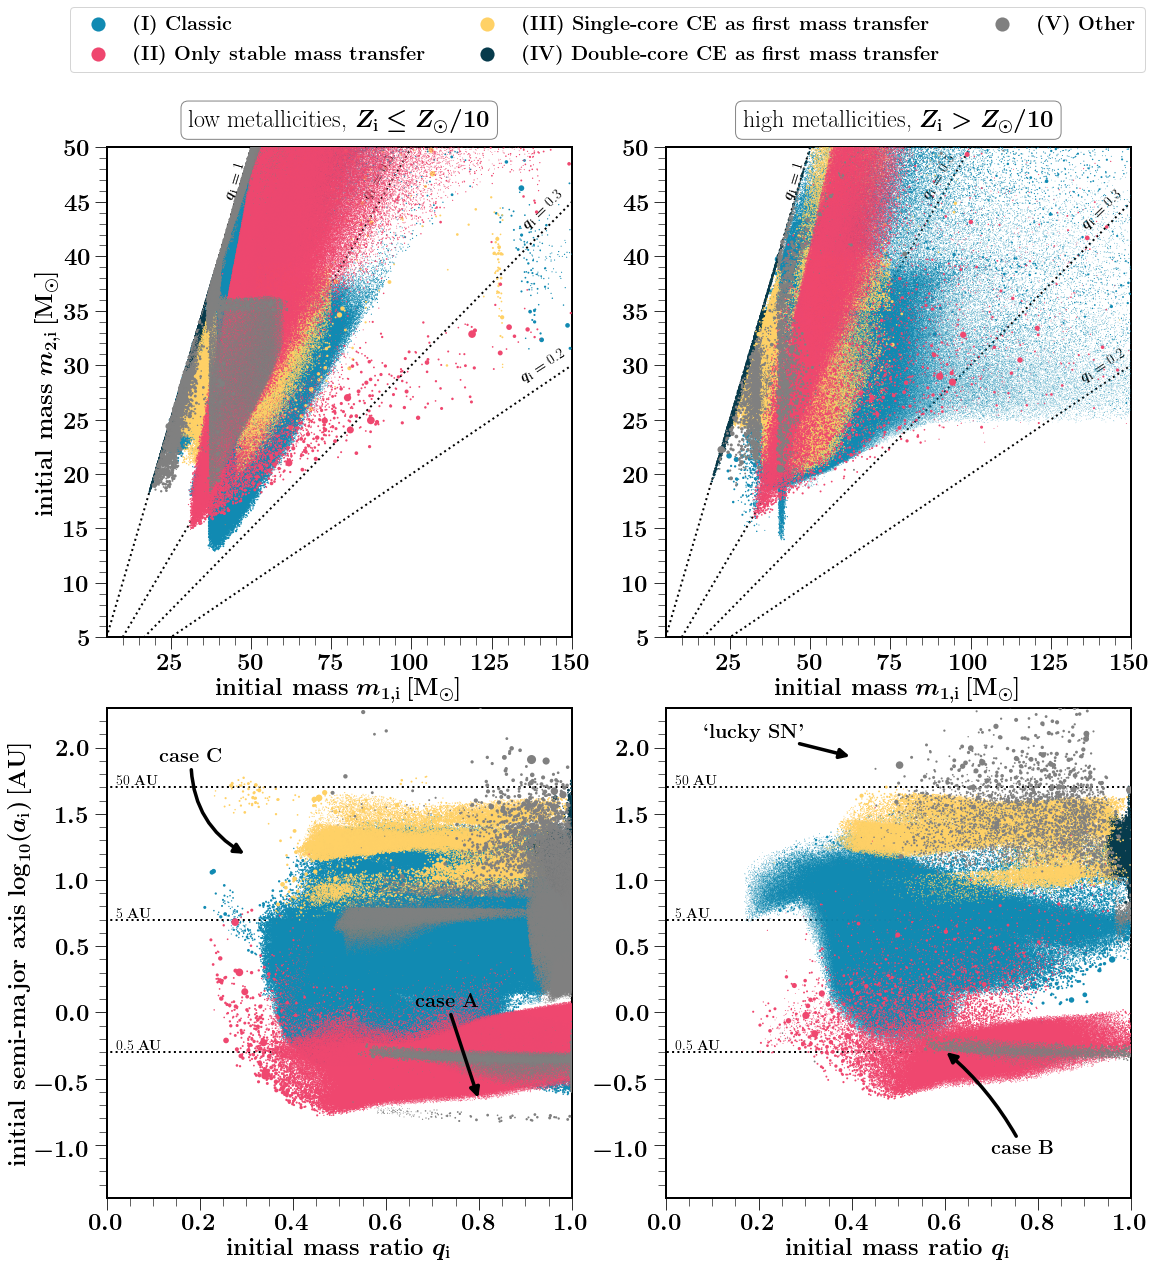

In [24]:


LOOP = False

# Use MSSFR Integrated weights?
WeightsRateIntrinsic_zIntegrated=False
if WeightsRateIntrinsic_zIntegrated==False:
    ModelName = 'notMSSFRweighted'

# multiply weights with this no to obtain scatter point area size
stimes_weight = 25

metallicities = [0.0014,  0.01269]


print('-----------------')
print('now doing initial masses (top panels)')
print('-----------------')

f, ax= plt.subplots(ncols=2,nrows=2, figsize=(16,16), 
                  gridspec_kw={"width_ratios":[1.5, 1.5]})




#### PLOT SEPARATION AND MASS RATIO ###
xlabel = r'\textbf{initial mass} $m_{1,{\rm{i}}} \, [\rm{M}_{\odot}]$'
ylabel = r'\textbf{initial mass} $m_{2,{\rm{i}}} \, [\rm{M}_{\odot}]$'


PlotText = True
fc=None

handles, labels = plotInitialMasses(ax=ax[0], fc=fc, Data=Data\
                  , dictRank=dictChannelsBHNS, dictList=dictChannelsBHNSList,channelLabelList=range(8), withinHubble=True)

lgd2 = f.legend(handles, legendlabel, fontsize=20, ncol=3,\
         bbox_to_anchor=(1.0, 1.1),  markerscale=3., scatterpoints=1) # loc = 'upper center')






markersize_lgd = 200
lgd2.legendHandles[0]._sizes = [markersize_lgd]
lgd2.legendHandles[1]._sizes = [markersize_lgd]
lgd2.legendHandles[2]._sizes = [markersize_lgd]
lgd2.legendHandles[3]._sizes = [markersize_lgd]
lgd2.legendHandles[4]._sizes = [markersize_lgd]



xlabel = r'\textbf{initial mass ratio} $q_{\rm{i}} $'
ylabel = r'\textbf{initial semi-major axis} $\log_{10}(a_{\rm{i}}) \, [\rm{AU}]$'

print('-----------------')
print('now doing q vs separation (bottom panels)')
print('-----------------')


# whether to plot labels text
PlotText = False
handles, labels = plotInitialqVSseparation(ax=ax[1], fc=fc, Data=Data\
                  , dictRank=dictChannelsBHNS, dictList=dictChannelsBHNSList, withinHubble=True)




##### ADD ARROWS ####

print('-----------------')
print('now drawing arrows')
print('-----------------')


# properties  arrow 
strr = r"\textbf{case A} "
x_xy, y_xy = 0.8, 0.2
x_xytext, y_xytext = 0.8, 0.4
conn = "arc3,rad=+0.0"

# draw arrow
ax[1,0].annotate(strr,
  xy=(x_xy, y_xy), xycoords='axes fraction',
  xytext=(x_xytext, y_xytext), textcoords='axes fraction',
  size=20, va="center", ha="right",
  arrowprops=dict(arrowstyle="-|>",
                  connectionstyle=conn,
                  fc="k", lw=3.5), zorder=20000)



# properties  arrow 
strr = r"\textbf{case C} "
x_xy, y_xy = 0.3, 0.7
x_xytext, y_xytext = 0.25, 0.9
conn = "arc3,rad=+0.3"

# draw arrow
ax[1,0].annotate(strr,
  xy=(x_xy, y_xy), xycoords='axes fraction',
  xytext=(x_xytext, y_xytext), textcoords='axes fraction',
  size=20, va="center", ha="right",
  arrowprops=dict(arrowstyle="-|>",
                  connectionstyle=conn,
                  fc="k", lw=3.5), zorder=20000)

# properties arrow 
strr = r"\textbf{case B} "
x_xy, y_xy = 0.6, 0.3
x_xytext, y_xytext = 0.7, 0.1
conn = "arc3,rad=+0.1"

# draw arrow redshift
ax[1,1].annotate(strr,
  xy=(x_xy, y_xy), xycoords='axes fraction',
  xytext=(x_xytext, y_xytext), textcoords='axes fraction',
  size=20, va="center", ha="left",
  arrowprops=dict(arrowstyle="-|>",
                  connectionstyle=conn,
                  fc="k", lw=3.5), zorder=20000)


# properties arrow 
strr = r"\textbf{`lucky SN'} "
x_xy, y_xy = 0.4, 0.9
x_xytext, y_xytext = 0.3, 0.95
conn = "arc3,rad=+0.0"
# draw arrow 
ax[1,1].annotate(strr,
  xy=(x_xy, y_xy), xycoords='axes fraction',
  xytext=(x_xytext, y_xytext), textcoords='axes fraction',
  size=20, va="center", ha="right",
  arrowprops=dict(arrowstyle="-|>",
                  connectionstyle=conn,
                  fc="k", lw=3.5), zorder=20000)

#########
#####  ####

print('-----------------')
print('now saving figure')
print('-----------------')

# save and show 
f.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5) 
f.savefig('./supplementary_material/BBH_InitialParameters_'+ ModelName + 'lowres.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 50)
# f.savefig('./BHNS_InitialParameters_'+ ModelName + '.pdf', bbox_extra_artists=(lgd2,), bbox_inches='tight')
plt.show()
plt.close()        



In [ ]:
fdata.close()

### Code used to play around with positions of arrows:

In [ ]:

f, ax= plt.subplots(ncols=2,nrows=2, figsize=(16,16), 
                  gridspec_kw={"width_ratios":[1.5, 1.5]})


# properties  arrow 
strr = r"\textbf{case A} "
x_xy, y_xy = 0.75, 0.2
x_xytext, y_xytext = 0.75, 0.4
conn = "arc3,rad=+0.0"

# draw arrow
ax[1,0].annotate(strr,
  xy=(x_xy, y_xy), xycoords='axes fraction',
  xytext=(x_xytext, y_xytext), textcoords='axes fraction',
  size=20, va="center", ha="right",
  arrowprops=dict(arrowstyle="-|>",
                  connectionstyle=conn,
                  fc="k", lw=3.5), zorder=20000)



# properties  arrow 
strr = r"\textbf{case C} "
x_xy, y_xy = 0.35, 0.65
x_xytext, y_xytext = 0.25, 0.85
conn = "arc3,rad=+0.3"

# draw arrow
ax[1,0].annotate(strr,
  xy=(x_xy, y_xy), xycoords='axes fraction',
  xytext=(x_xytext, y_xytext), textcoords='axes fraction',
  size=20, va="center", ha="right",
  arrowprops=dict(arrowstyle="-|>",
                  connectionstyle=conn,
                  fc="k", lw=3.5), zorder=20000)





# properties arrow 
strr = r"\textbf{case B} "
x_xy, y_xy = 0.6, 0.4
x_xytext, y_xytext = 0.7, 0.2
conn = "arc3,rad=+0.1"

# draw arrow redshift
ax[1,1].annotate(strr,
  xy=(x_xy, y_xy), xycoords='axes fraction',
  xytext=(x_xytext, y_xytext), textcoords='axes fraction',
  size=20, va="center", ha="left",
  arrowprops=dict(arrowstyle="-|>",
                  connectionstyle=conn,
                  fc="k", lw=3.5), zorder=20000)


# properties arrow 
strr = r"\textbf{`lucky SN'} "
x_xy, y_xy = 0.4, 0.85
x_xytext, y_xytext = 0.3, 0.9
conn = "arc3,rad=+0.0"

# draw arrow 
ax[1,1].annotate(strr,
  xy=(x_xy, y_xy), xycoords='axes fraction',
  xytext=(x_xytext, y_xytext), textcoords='axes fraction',
  size=20, va="center", ha="right",
  arrowprops=dict(arrowstyle="-|>",
                  connectionstyle=conn,
                  fc="k", lw=3.5), zorder=20000)



plt.show()

# Make additional figures for online supplementary 

In [ ]:
import string

# some label lists for different models 
nModels=15
BPSnameslist = list(string.ascii_uppercase)[0:nModels]
# I put every data file in an own directory, with the following names: 
modelDirList = ['fiducial', 'massTransferEfficiencyFixed_0_25', 'massTransferEfficiencyFixed_0_5', 'massTransferEfficiencyFixed_0_75', \
               'unstableCaseBB', 'alpha0_5', 'alpha2_0', 'fiducial', 'rapid', 'maxNSmass2_0', 'maxNSmass3_0', 'noPISN',  'ccSNkick_100km_s', 'ccSNkick_30km_s', 'noBHkick' ]

alphabetDirDict =  {BPSnameslist[i]: modelDirList[i] for i in range(len(BPSnameslist))}


physicalNamesBPSmodels = [r'\textbf{fiducial}',\
                           r'$\beta=0.25$', r'$\beta=0.5$',  r'$\beta=0.75$',r'\textbf{unstable case BB}',\
                           r'$\alpha_{\rm{CE}}=0.5$',  r'$\alpha_{\rm{CE}}=2$', r'\textbf{optimistic CE}',\
                          r'\textbf{rapid SN}', r'$\rm{max} \ m_{\rm{NS}}=2.0\,\rm{M}_{\odot}$', r'$\rm{max} \ m_{\rm{NS}}=3.0\,\rm{M}_{\odot}$',\
                          r'\textbf{no PISN}', r'\textbf{SN} '+ r'$\sigma_{\rm{cc}}=100\,\rm{km}\,\rm{s}^{-1}$',r'\textbf{SN} '+ r'$\sigma_{\rm{cc}}=30\,\rm{km}\,\rm{s}^{-1}$',\
                          r'\textbf{SN} '+ r'$v_{\rm{k,BH}}=0\,\rm{km}\,\rm{s}^{-1}$' ]



alphabetPhysicalNameDict =  {BPSnameslist[i]: physicalNamesBPSmodels[i] for i in range(len(BPSnameslist))}

## Loop over all binary population synthesis models: 

In [ ]:
print(pathCOMPASOutput)

In [ ]:
mainpath = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'

# I want figure for BHNS binaries
DCOtype='BHNS'


for ind_bps, bps_model in enumerate(BPSnameslist):
    
    
    print()
    print('-----------------')
    print('now doing BPS model %s, %s'%(bps_model, alphabetDirDict[bps_model]))



    
    
    # get fdata from path to this particularly bps file based on how I named the different models
    path = mainpath + str(alphabetDirDict[bps_model]) + '/COMPASCompactOutput_' + DCOtype +'_' + bps_model +'.h5'
    fdata = h5.File(path)


    OPTIMISTIC=False
    if bps_model=='H':
        # only for model H we want optimistic CE selection
        OPTIMISTIC=True
        print('doing optimistic version of fiducial')    

    
    




    ##### Setting DATA file #####
    print('now getting Data)')
    #But I want only within Hubble time 
    Data            = CC.COMPASData(path=path, lazyData=True, Mlower=5., \
                     Mupper=150., binaryFraction=1)
    Data.setCOMPASDCOmask(types=DCOtype,  withinHubbleTime=True, optimistic=OPTIMISTIC)
    Data.setCOMPASData()
    SeedsHubble    = Data.seeds[Data.Hubble==True]




    # calculate the uncertainty on the rate from poisson scatter: 
    print('total weight BHNS mergers in COMPAS simulation =', np.sum(Data.weight))
    rate = np.sum(Data.weight)
    Nzeros = int(53*1E6 - len(Data.weight))
    all_weights = np.concatenate((np.zeros(Nzeros), Data.weight))
    var_rate = np.std(all_weights, ddof=1) * np.sqrt(1E6)

    print('fractional uncertainty on total weight BH-NS =', var_rate/rate)
    print('percentage uncertainty on total weight BH-NS =', 100*var_rate/rate, '%')

    print('STROOPWAFEL gain =', len((Data.weight))/np.sum(Data.weight))

    # metallicities 
    DATAmetallicities = Data.metallicitySystems




    

    ###### CALCULATING FORMATION CHANNELS #########
    print('now calculating formation channels')
    
    # obtain the seeds of the BHNS for each channel

    seedsPercentageClassic, seedsPercentageOnlyStableMT = returnSeedsPercentageClassicAndOnlyStableMT(pathCOMPASOutput=path,\
                                    types=DCOtype,  withinHubbleTime=True, optimistic=False, \
                                    binaryFraction=1)
    seedsClassic, _ = seedsPercentageClassic
    seedsOnlyStableMT, _ = seedsPercentageOnlyStableMT



    seedsDoubleCE,_ = returnSeedsPercentageDoubleCoreCEE(pathCOMPASOutput=path,\
                                    types=DCOtype,  withinHubbleTime=True, optimistic=OPTIMISTIC, \
                                    binaryFraction=1)


    seedsSingleCE, _ = returnSeedsPercentageSingleCoreCEE(pathCOMPASOutput=path,\
                                    types=DCOtype,  withinHubbleTime=True, optimistic=OPTIMISTIC, \
                                    binaryFraction=1)



    seedschannels = [seedsClassic, seedsOnlyStableMT, seedsSingleCE, seedsDoubleCE]

    seedsOther, _ = returnSeedsPercentageOther(pathCOMPASOutput=path,\
                                    types=DCOtype,  withinHubbleTime=True, optimistic=OPTIMISTIC, \
                                    binaryFraction=1, channelsSeedsList=seedschannels)




    dictChannelsBHNS = { 'classic':seedsClassic, \
                        'immediate CE':seedsSingleCE,\
                             'stable B no CEE':seedsOnlyStableMT, \
                         r'double-core CE':seedsDoubleCE,  \
                            'other':seedsOther\
                           }




    LOOP = True

    # Use MSSFR Integrated weights?
    WeightsRateIntrinsic_zIntegrated=False
    if WeightsRateIntrinsic_zIntegrated==False:
        ModelName = 'notMSSFRweighted'

    # multiply weights with this no to obtain scatter point area size
    stimes_weight = 25




    print('now making figure')
  

    f, ax= plt.subplots(ncols=2,nrows=2, figsize=(16,16), 
                      gridspec_kw={"width_ratios":[1.5, 1.5]})




    #### PLOT SEPARATION AND MASS RATIO ###
    xlabel = r'\textbf{initial mass} $m_{1,{\rm{i}}} \, [\rm{M}_{\odot}]$'
    ylabel = r'\textbf{initial mass} $m_{2,{\rm{i}}} \, [\rm{M}_{\odot}]$'


    PlotText = True
    fc=None

    handles, labels = plotInitialMasses(ax=ax[0], fc=fc, Data=Data\
                      , dictRank=dictChannelsBHNS, dictList=dictChannelsBHNSList,channelLabelList=range(8), withinHubble=True)

    lgd2 = f.legend(handles, legendlabel, fontsize=20, ncol=3,\
             bbox_to_anchor=(1.0, 1.1),  markerscale=3., scatterpoints=1) # loc = 'upper center')






    markersize_lgd = 200
    lgd2.legendHandles[0]._sizes = [markersize_lgd]
    lgd2.legendHandles[1]._sizes = [markersize_lgd]
    lgd2.legendHandles[2]._sizes = [markersize_lgd]
    lgd2.legendHandles[3]._sizes = [markersize_lgd]
    lgd2.legendHandles[4]._sizes = [markersize_lgd]



    xlabel = r'\textbf{initial mass ratio} $q_{\rm{i}} $'
    ylabel = r'\textbf{initial semi-major axis} $\log_{10}(a_{\rm{i}}) \, [\rm{AU}]$'




    # whether to plot labels text
    PlotText = False
    handles, labels = plotInitialqVSseparation(ax=ax[1], fc=fc, Data=Data\
                      , dictRank=dictChannelsBHNS, dictList=dictChannelsBHNSList, withinHubble=True)





    #####  ####

    # save and show 
    f.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5) 
    f.savefig('./supplementary_material/BHNS_InitialParameters_'+ bps_model + '.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
    plt.show()
    plt.close()   
    fdata.close() 
    print('finished, figure is saved in the directory supplementary_material/')

